In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
sns.set_style("whitegrid")

In [3]:
df= sns.load_dataset("penguins")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [10]:
df.select_dtypes(include="object").describe(include="all")

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,152,168,168


In [18]:
new_df = []

for col in df.select_dtypes(include="object").columns:
    new_df.append(df[col].describe(include="all"))
pd.DataFrame(new_df)


,count,unique,top,freq
species,344,3,Adelie,152
island,344,3,Biscoe,168
sex,333,2,Male,168


In [22]:
for col in df.select_dtypes(include="object").columns:
    print(f"{df[col].count()}\n\n")
    print(f"{df[col].value_counts()}\n\n")

344


species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


344


island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64


333


sex
Male      168
Female    165
Name: count, dtype: int64




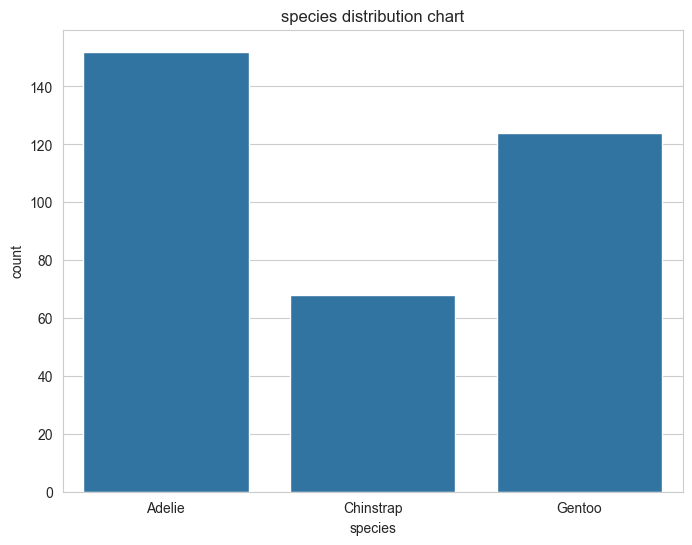

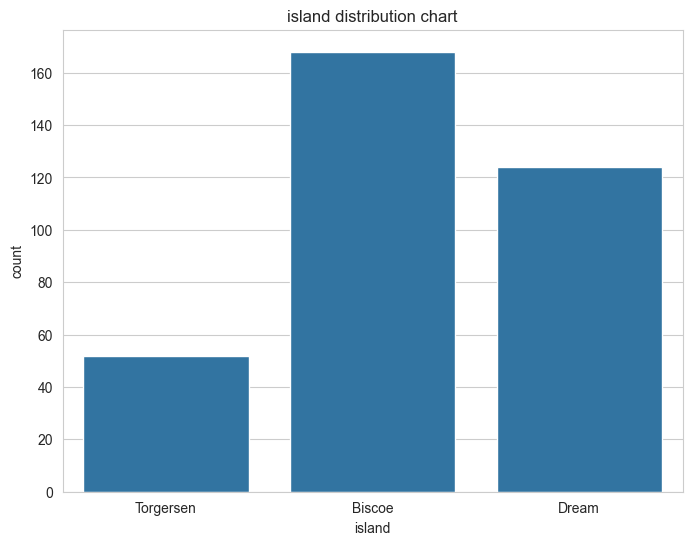

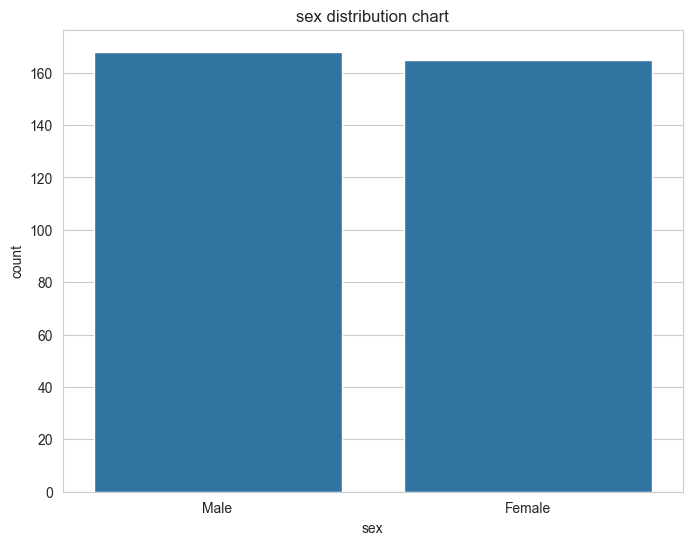

In [32]:
for col in df.select_dtypes(include="object").columns:
    fig, axes= plt.subplots(figsize=(8,6))
    sns.countplot(data=df, x=col)
    plt.title(f"{col} distribution chart")
    print("\n\n")
    plt.show()

In [33]:
df2= sns.load_dataset("tips")
df2

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [45]:
df2.quantile(q=[1.0])

,total_bill,tip,sex,smoker,day,time,size
1.0,50.81,10.0,1.0,1.0,3.0,1.0,6.0


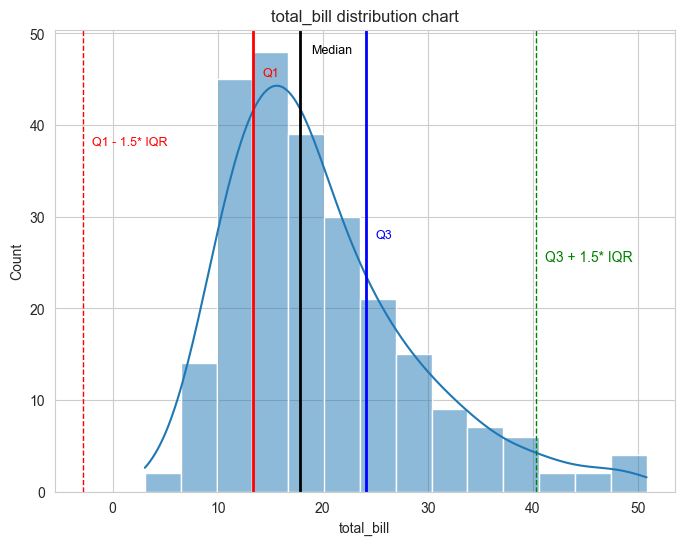

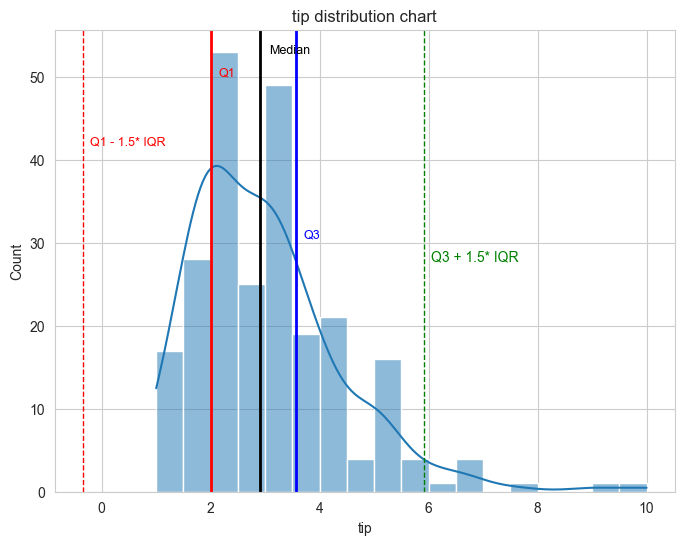

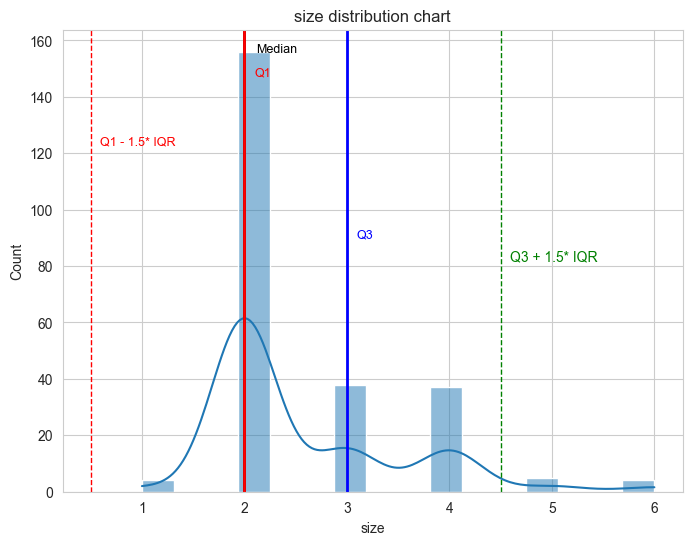

In [53]:
for col in df2.select_dtypes(include="number").columns:
    fig, axes = plt.subplots(figsize=(8, 6))
    plt.title(f"{col} distribution chart")
    sns.histplot(data=df2, x=col, kde=True)
    

    plt.axvline(df2[col].median(), linestyle="-", linewidth=2, c="k")
    plt.text(x = df2[col].median() + df2[col].std()/8, y=axes.get_ylim()[1] * 0.95, 
             s="Median", fontsize=9, c="k")
    
    IQR = df2[col].quantile(q=0.75) - df2[col].quantile(q=0.25)

    plt.axvline(df2[col].quantile(q= 0.25), linestyle="-", linewidth=2, c="r")
    plt.text(x = df2[col].quantile(q= 0.25) + df2[col].std()/10, y=axes.get_ylim()[1] * 0.90, 
             s="Q1", fontsize=9, c="r")
    
    plt.axvline(df2[col].quantile(q=0.25) - 1.5*IQR, linestyle="--", 
                linewidth= 1, c="r")
    plt.text(x = df2[col].quantile(q=0.25) - 1.5 * IQR + df2[col].std()/10, c="r",
             s="Q1 - 1.5* IQR", fontsize=9, y=axes.get_ylim()[1] * 0.75)
    
    plt.axvline(df2[col].quantile(q=0.75), linestyle="-", linewidth=2, c="b")
    plt.text(x = df2[col].quantile(q=0.75) + df2[col].std()/10, c="b", 
             y=axes.get_ylim()[1]* 0.55, fontsize=9, s="Q3")

    plt.axvline(df2[col].quantile(q=0.75) + 1.5*IQR, linestyle="--", c="g", 
                linewidth=1)
    plt.text(x = df2[col].quantile(q=0.75) + 1.5 * IQR + df2[col].std()/10, c="g", 
             y=axes.get_ylim()[1] * 0.50, fontsize=10, s="Q3 + 1.5* IQR")
    
    plt.show()



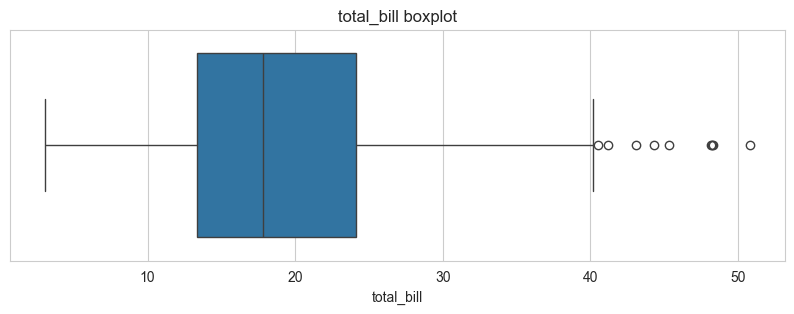

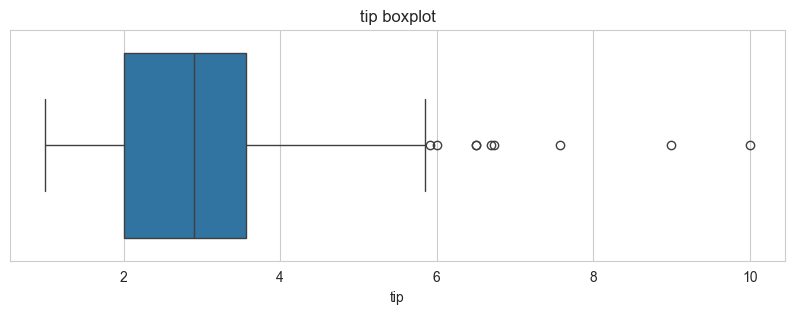

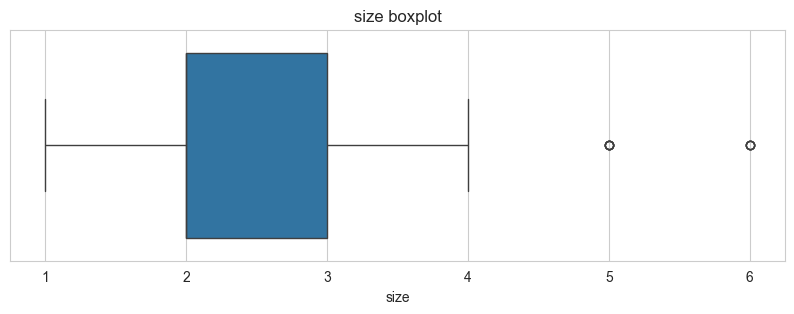

In [61]:
for col in df2.select_dtypes(include="number").columns:
    fig, axes= plt.subplots(figsize=(10,3))
    plt.title(f"{col} boxplot")
    sns.boxplot(data=df2, x=col)
    plt.show()
    print("\n\n")

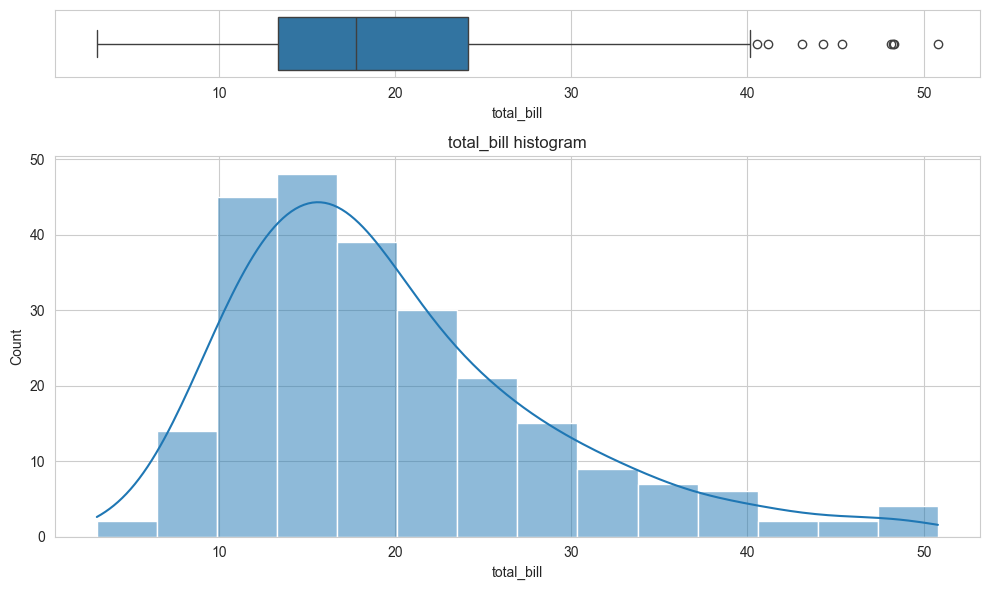

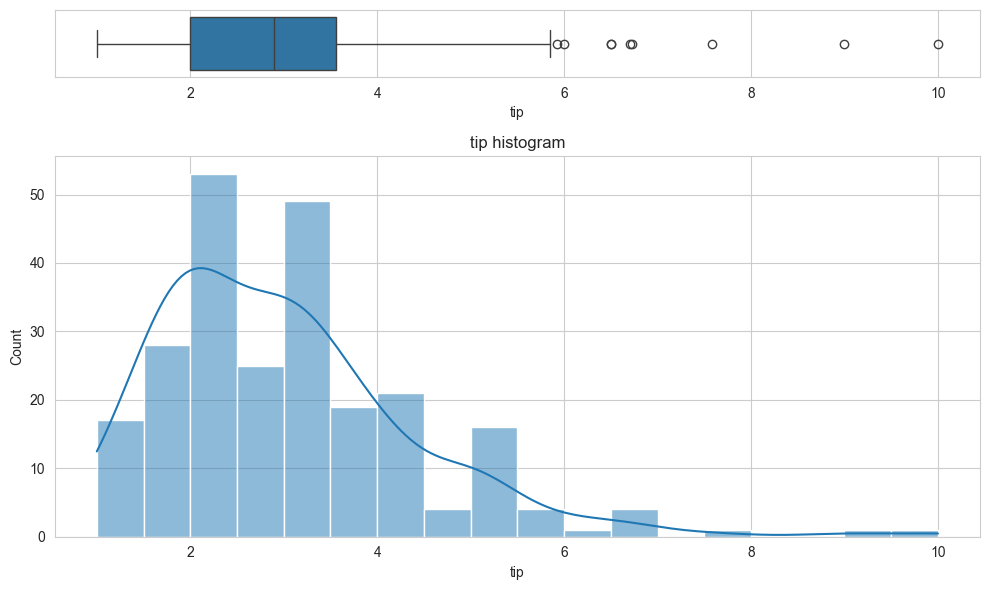

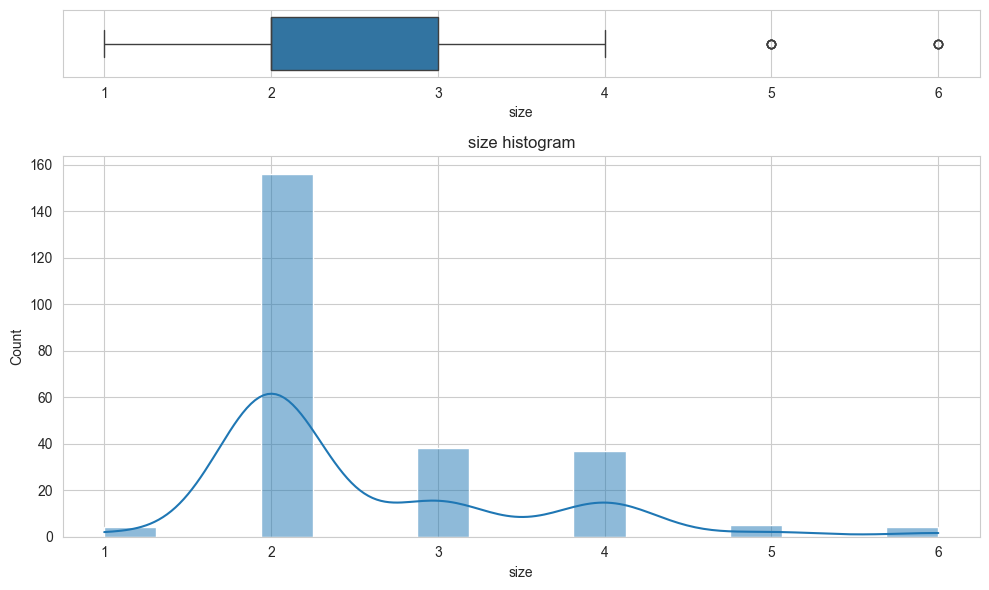

In [68]:
for col in df2.select_dtypes(include="number").columns:
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
    plt.title(f"{col} boxplot")
    sns.boxplot(data=df2, x=col, ax=axes[0])
    print("\n\n")
    plt.title(f"{col} histogram")
    sns.histplot(data=df2, x=col, kde=True, ax=axes[1])
    plt.tight_layout()
    plt.show()



In [71]:
df2.select_dtypes(include="number").skew()

total_bill    1.133213
tip           1.465451
size          1.447882
dtype: float64

In [72]:
df2.select_dtypes(include="number").kurtosis()

total_bill    1.218484
tip           3.648376
size          1.731700
dtype: float64

In [82]:
ser_skew = df2.select_dtypes(include="number").skew()
ser_skew.name = "Skewness"

ser_kurt= df2.select_dtypes(include="number").kurtosis()
ser_kurt.name = "Kurtosis"

summary_stats = df2.describe(include="all")
summary_stats = pd.concat([summary_stats, ser_skew.to_frame().T, 
                           ser_kurt.to_frame().T], axis=0)
summary_stats

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000
